<a href="https://colab.research.google.com/github/omarion3698/phishingUrls/blob/master/phishing_test_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Omar A. Hussein
## ID: 663880
## Lecturer: Dr. Lawrence Nderu

This is the second notebook where am building a decision tree classifier using the urlset dataset provided in my github repository and I have integrated it with Weights & Biases for logging and tracking my experiments.

# Setup W&B

In [1]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [2]:
import wandb

# initialize w&b
wandb.init(project="test_phishing_using_decision_tree")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Familiarizing with the data

In [44]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("/content/sample_data/urlset.csv", header='infer', encoding='ISO-8859-1')

<ipython-input-4-62f13cb7e031>:1: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/sample_data/urlset.csv", header='infer', encoding='ISO-8859-1')


In [5]:
# check sample of the dataset
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96006,xbox360.ign.com/objects/850/850402.html,339,1,1,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0
96007,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1,0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0
96008,www.gamespot.com/xbox360/action/deadspace/,753,1,1,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0
96009,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1,1,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0


In [6]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96011 entries, 0 to 96010
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96007 non-null  object 
 1   ranking        95955 non-null  object 
 2   mld_res        95937 non-null  object 
 3   mld.ps_res     95926 non-null  object 
 4   card_rem       95925 non-null  float64
 5   ratio_Rrem     95925 non-null  float64
 6   ratio_Arem     95925 non-null  float64
 7   jaccard_RR     95924 non-null  float64
 8   jaccard_RA     95923 non-null  float64
 9   jaccard_AR     95922 non-null  float64
 10  jaccard_AA     95921 non-null  float64
 11  jaccard_ARrd   95921 non-null  object 
 12  jaccard_ARrem  95919 non-null  object 
 13  label          95915 non-null  object 
dtypes: float64(7), object(7)
memory usage: 10.3+ MB


In [7]:
# Checking the shape of the dataset
data.shape

(96011, 14)

In [8]:
# Check the columns of the dataset
data.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

# EDA

In [9]:
# show how many null values are there in each column of the dataset
data.isnull().sum()

domain            4
ranking          56
mld_res          74
mld.ps_res       85
card_rem         86
ratio_Rrem       86
ratio_Arem       86
jaccard_RR       87
jaccard_RA       88
jaccard_AR       89
jaccard_AA       90
jaccard_ARrd     90
jaccard_ARrem    92
label            96
dtype: int64

<Axes: >

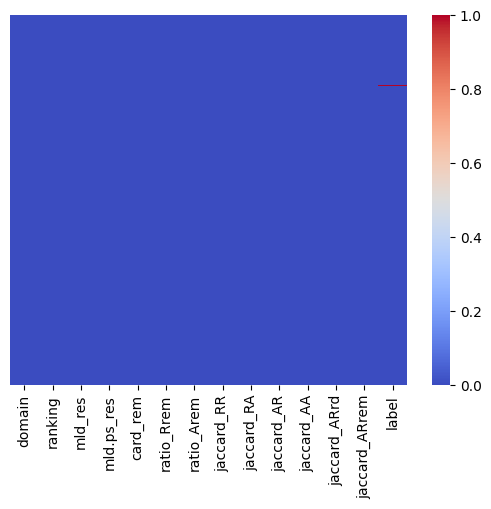

In [10]:
# Visualize the missing values using a heatmap
import seaborn as sns
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='coolwarm')

In [11]:
# Drop missing data
data = data.dropna()

In [12]:
# Check missing data
data.isnull().sum()

domain           0
ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

In [13]:
# Dropping the domain column
data = data.drop('domain', axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95915 entries, 0 to 96010
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        95915 non-null  object 
 1   mld_res        95915 non-null  object 
 2   mld.ps_res     95915 non-null  object 
 3   card_rem       95915 non-null  float64
 4   ratio_Rrem     95915 non-null  float64
 5   ratio_Arem     95915 non-null  float64
 6   jaccard_RR     95915 non-null  float64
 7   jaccard_RA     95915 non-null  float64
 8   jaccard_AR     95915 non-null  float64
 9   jaccard_AA     95915 non-null  float64
 10  jaccard_ARrd   95915 non-null  object 
 11  jaccard_ARrem  95915 non-null  object 
 12  label          95915 non-null  object 
dtypes: float64(7), object(6)
memory usage: 10.2+ MB


In [15]:
# Convert 'label' column to numeric data type
data['label'] = pd.to_numeric(data['label'], errors='coerce')

In [16]:
# Check the data type of all the columns
data.dtypes

ranking           object
mld_res           object
mld.ps_res        object
card_rem         float64
ratio_Rrem       float64
ratio_Arem       float64
jaccard_RR       float64
jaccard_RA       float64
jaccard_AR       float64
jaccard_AA       float64
jaccard_ARrd      object
jaccard_ARrem     object
label            float64
dtype: object

In [17]:
# Check the values of the column 'label'
data['label'].unique()

array([1.      ,      nan, 0.770083, 0.      ])

I realised that the 'label' column does not have values as either 1 or 0 but rather consists of array of values.

In [18]:
# Fill NaNs with a specific value
data['label'].fillna(0, inplace=True)

In [19]:
# Check the values of the column 'label'
data['label'].unique()

array([1.      , 0.      , 0.770083])

In [20]:
data.head()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0


In [21]:
data.tail()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
96006,339,1,1,2.0,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96007,63029,1,0,3.0,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96008,753,1,1,3.0,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96009,6,1,1,4.0,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0
96010,2547,1,1,5.0,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157,0.0


In [22]:
# Count the occurences of each unique value in the column 'label'
data['label'].value_counts()

label
0.000000    48010
1.000000    47904
0.770083        1
Name: count, dtype: int64

In [23]:
# Remove numbers after the decimal point and keep only whole numbers in the 'label column
# data['label'] = data['label'].astype(int)

In [24]:
# Count the occurences of each unique value in the column 'label'
data['label'].value_counts()

label
0.000000    48010
1.000000    47904
0.770083        1
Name: count, dtype: int64

In [25]:
# shuffling the rows in the dataset so that when splitting the train and test
# sets are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000,0,0,7.0,97.285714,98.285714,0.000000,0.0,0.000000,0.0,0,0.81565,1.0
1,44061,1,0,3.0,105.666667,107.333333,0.003135,0.0,0.003145,0.0,0.666667,0.794944,1.0
2,14324,0,0,3.0,253.333333,267.000000,0.000000,0.0,0.000000,0.0,0.0,0.880723,0.0
3,359561,1,0,5.0,102.800000,105.600000,0.000000,0.0,0.000000,0.0,0.5,0.79346,0.0
4,10000000,0,0,4.0,37.750000,39.500000,0.000000,0.0,0.000000,0.0,0.0,0.601036,0.0


In [26]:
# Check the data types of all the columns
data.dtypes

ranking           object
mld_res           object
mld.ps_res        object
card_rem         float64
ratio_Rrem       float64
ratio_Arem       float64
jaccard_RR       float64
jaccard_RA       float64
jaccard_AR       float64
jaccard_AA       float64
jaccard_ARrd      object
jaccard_ARrem     object
label            float64
dtype: object

# Visualize the dataset

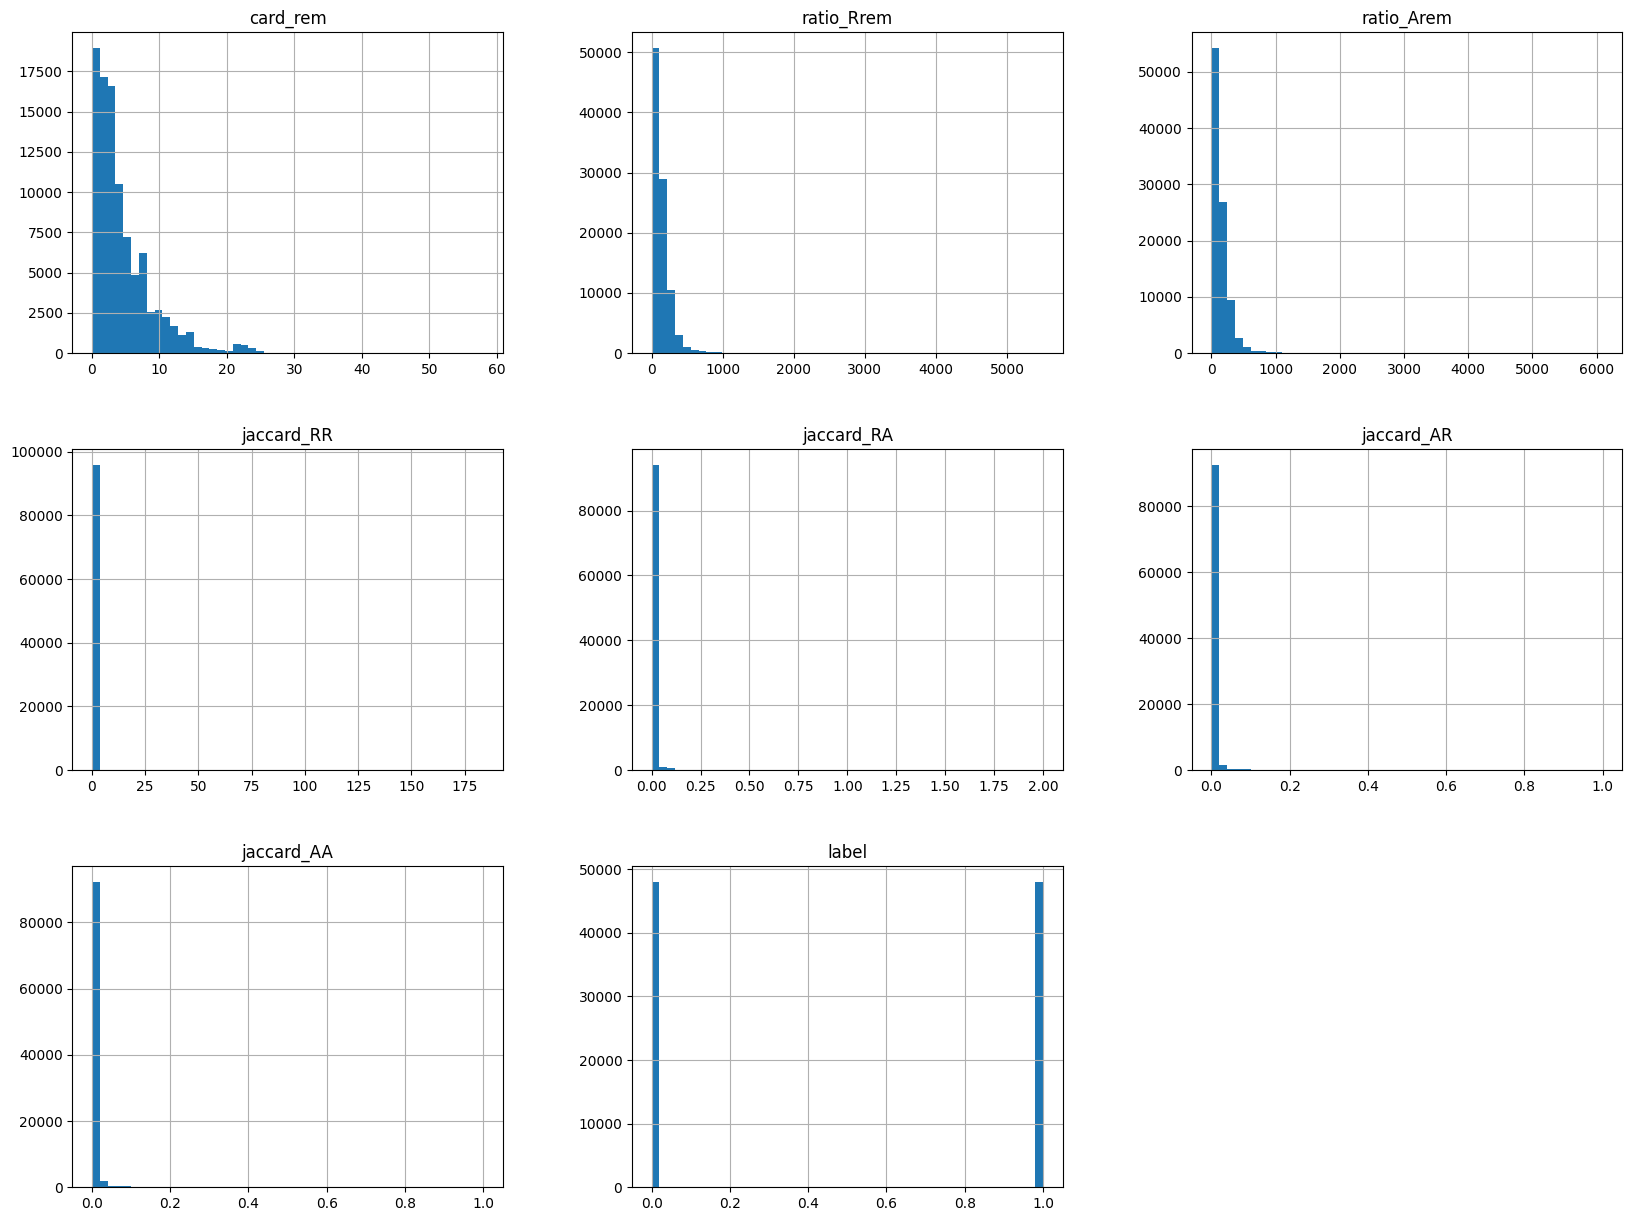

In [27]:
# plotting the data distribution
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
# Convert categorical data to numeric
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        # Check if the column contains mixed types and convert to strings if necessary
        if any(isinstance(x, int) for x in data[column]) and any(isinstance(x, str) for x in data[column]):
            data[column] = data[column].astype(str)
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

In [31]:
# Feature and target separation
X = data.drop('label', axis=1)
y = data['label']

# Split and Train

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Convert y_train to a categorical data type
y_train = y_train.astype('int')

In [34]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Make predictionns on the test set
y_pred = clf.predict(X_test)

# Log Metrics to Wandb

In [37]:
# Import the necessary modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9468800500443101
Precision: 0.9425881866142547
Recall: 0.9515455304928989
F1 Score: 0.9470456789481889


In [49]:
# log the model hyperparameters
wandb.log({
    'accuracy': accuracy,
    'confusion_matrix': cm,
    'precision': precision,
    'recall': recall,
    'f1_score': f1_score
})

# Evaluate the model

In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9468800500443101


In [47]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[9052  555]
 [ 464 9112]]


The confusion matrix has:
- 9052 True Positives (TP) and 555 False Negatives (FN) indicating correct and missed positive predictions.
- 464 False Positives (FP) and 9112 True Negatives (TN) indicating incorrect and correct negative predictions.
This shows the model's strength in correctly predicting both classes with relatively low errors in both false positives and negatives.

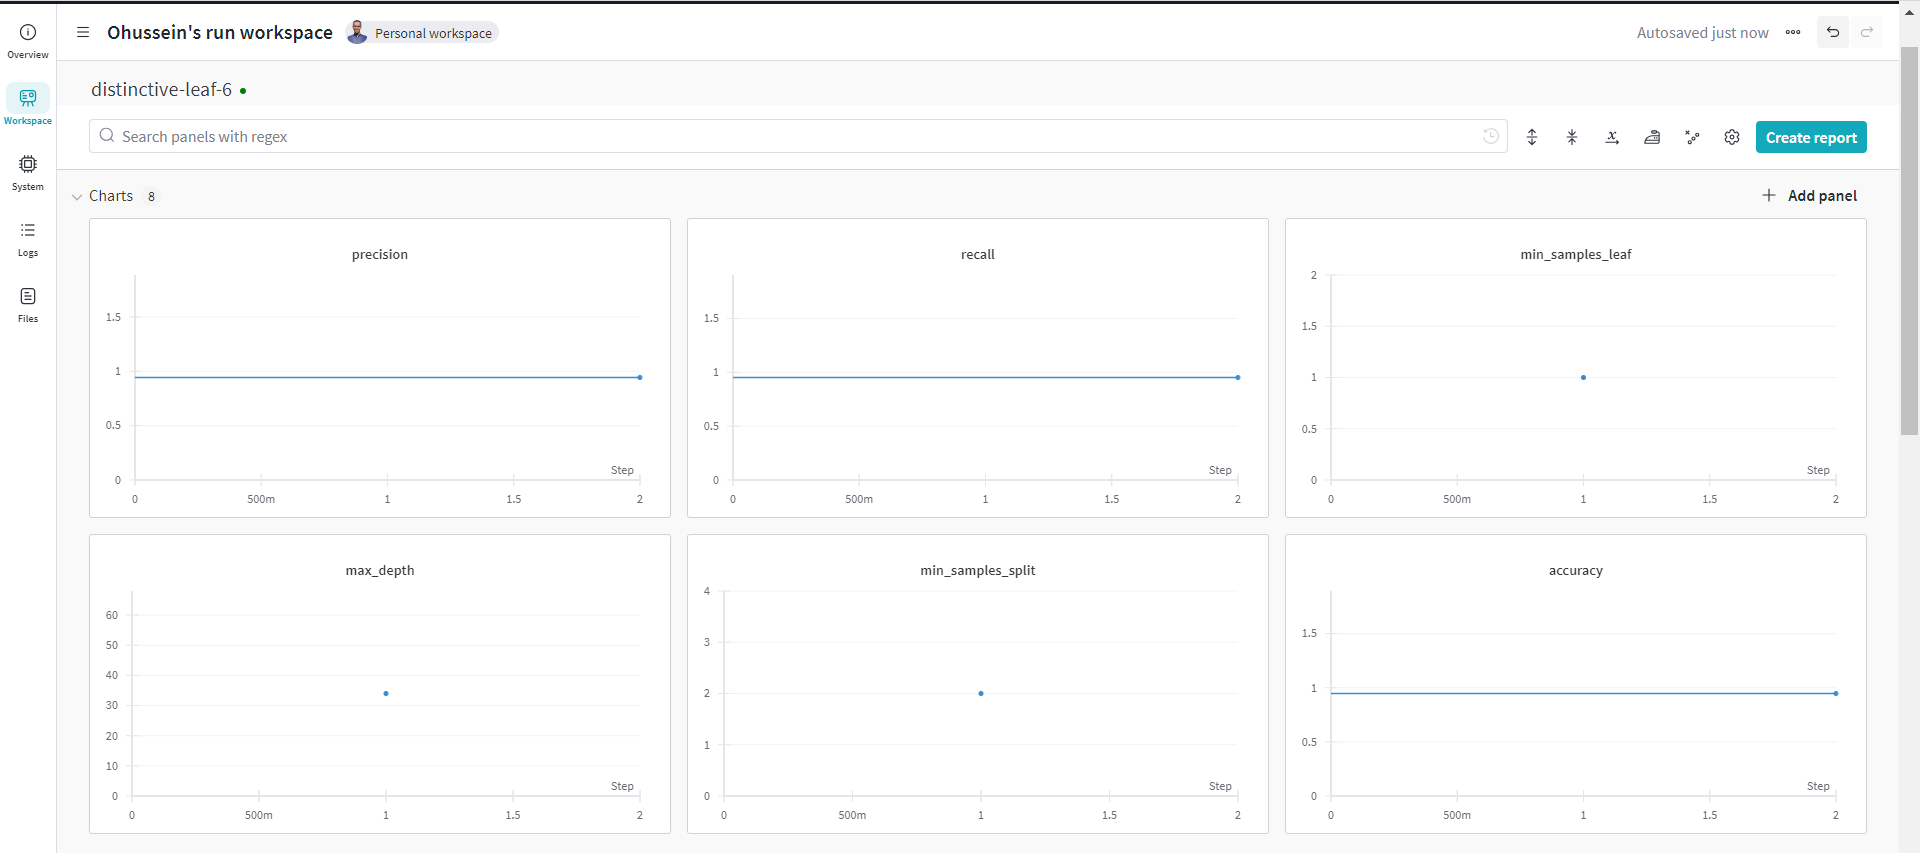

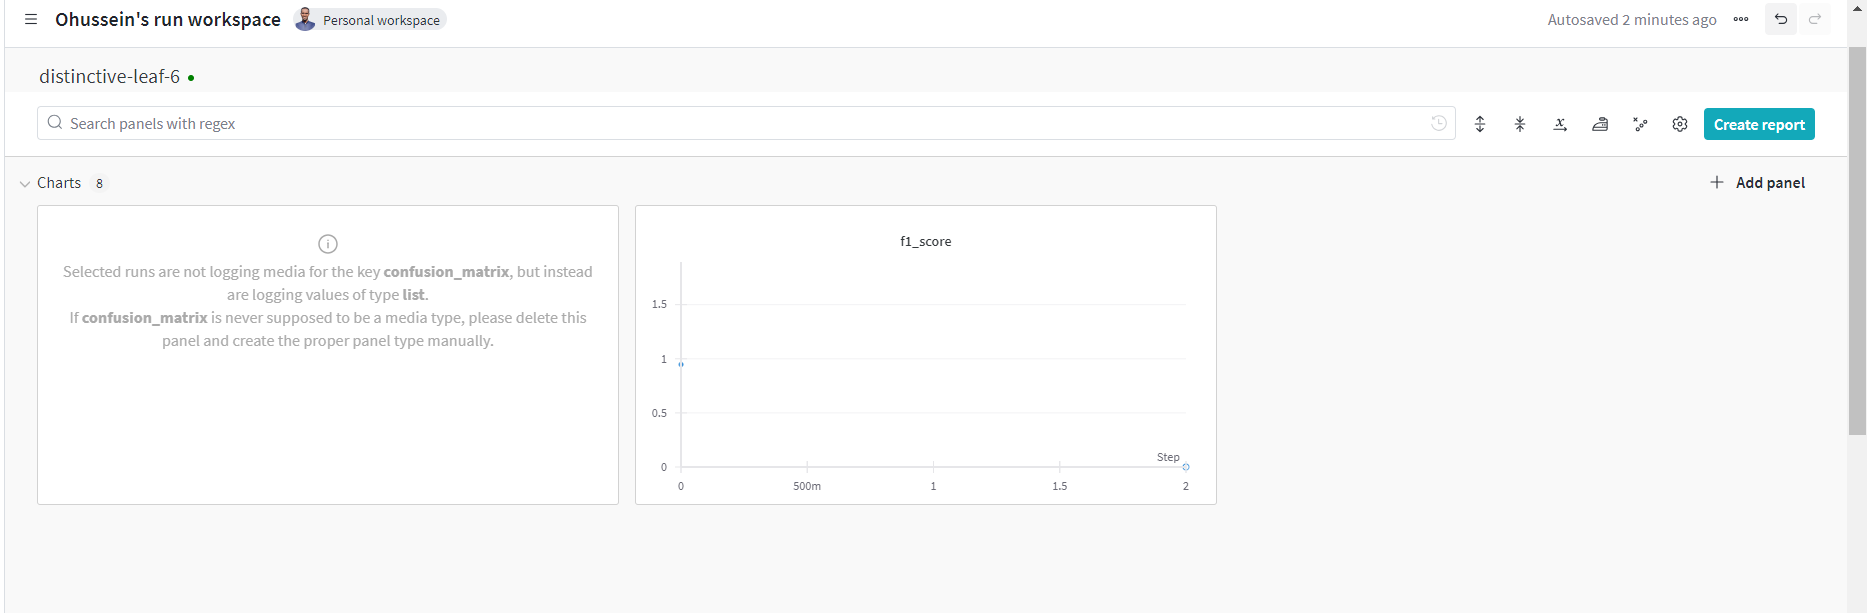

The model achieved an accuracy of 94.6%, indicatding that it correctly classified 83% of the samples.

The model's precision is 94%, which means that 83% of the samples predicted as positive were indeed positive.

The recall of 95% indicates that the model successfully identified 83% of the actual positive instances.

The F1 score is 94.7%, reflecting a good balance between precision and recall.

# Save the model

In [50]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'clf_model.pkl')

['clf_model.pkl']

In [51]:
# load the model to wandb
wandb.save('clf_model.pkl')

['/content/wandb/run-20240725_092133-u24e0ayf/files/clf_model.pkl']

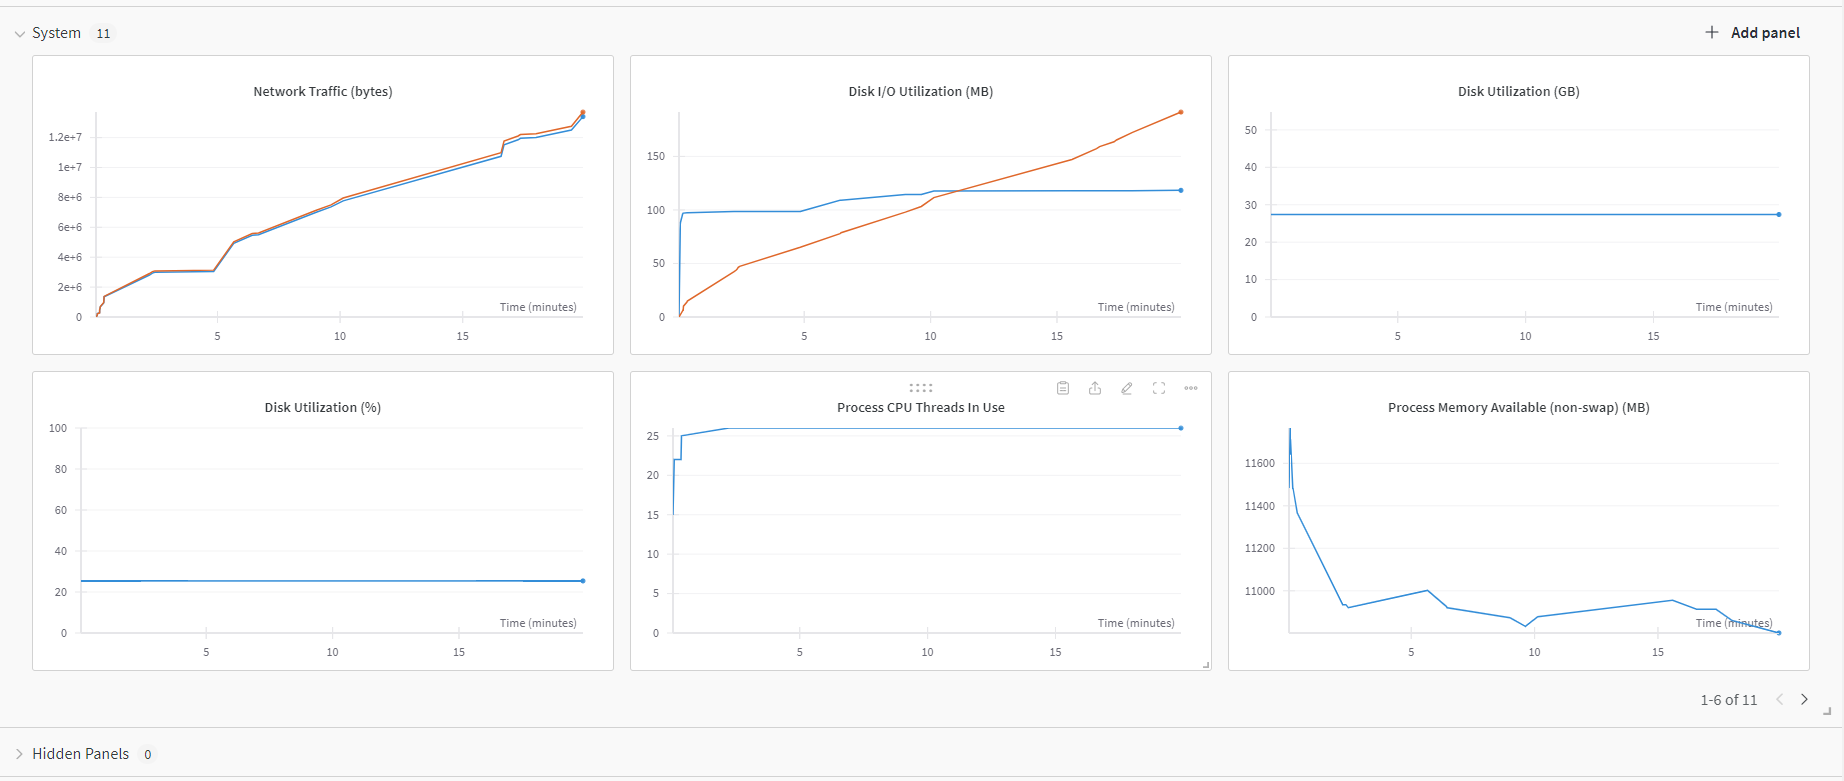

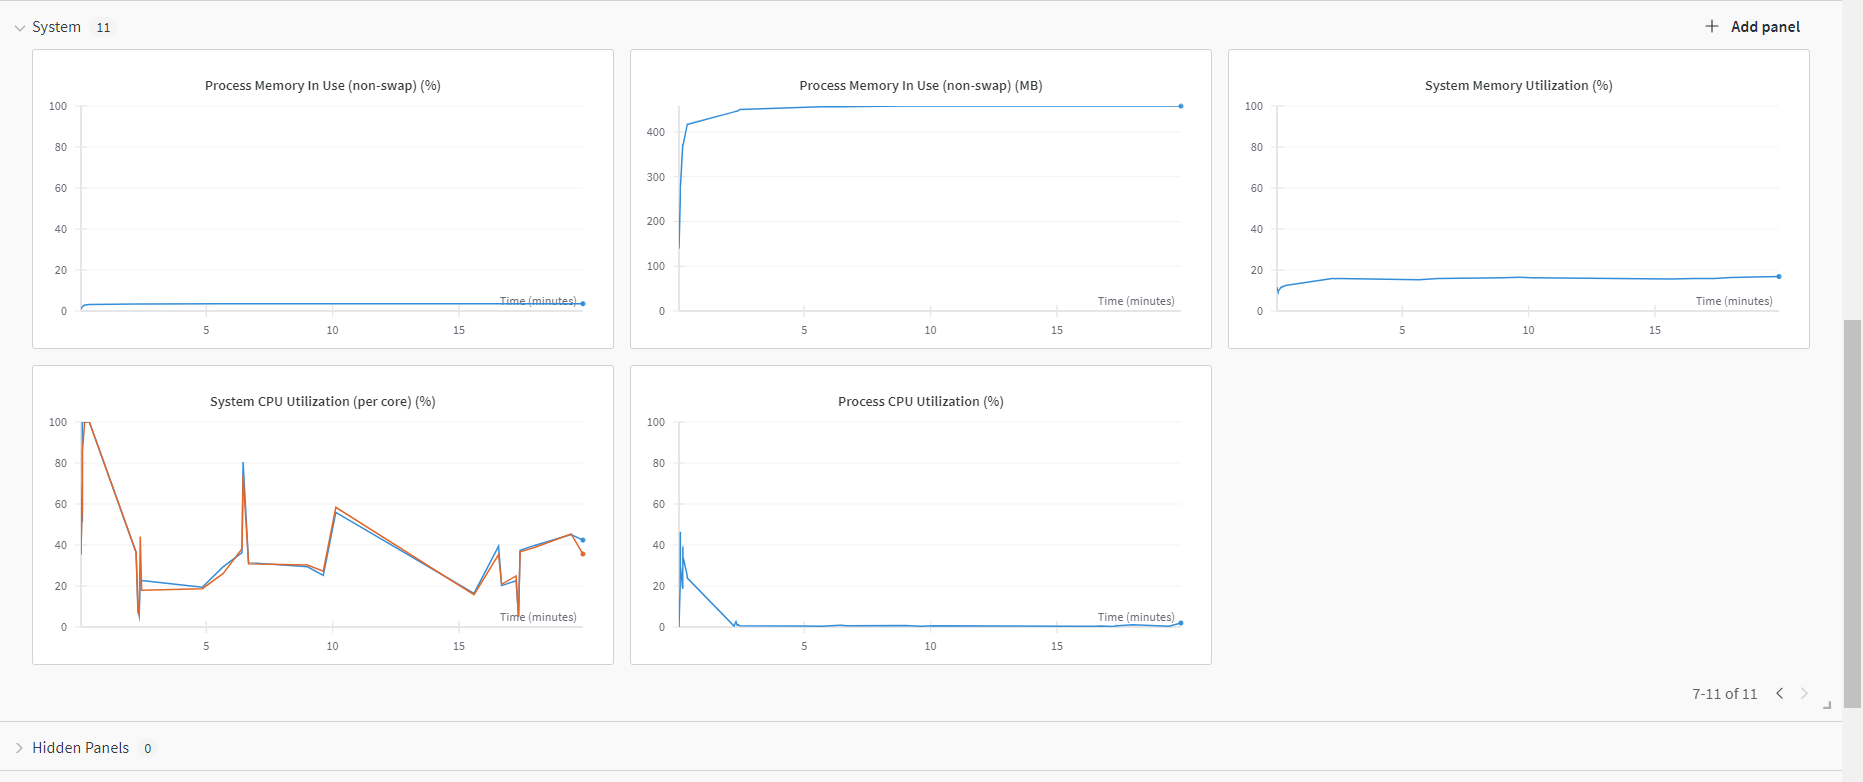

Decision tree classification often outperforms logistic regression in terms of accuracy, especially in scenarios involving non-linear relationships, feature interactions, robustness to outliers, and datasets with mixed feature types as the dataset used in this repository.